In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from testmining import folders
from testmining.failure_distance import distance_bar_chart, collect_distances, make_scatter_chart

In [3]:
strategies = [
    'recently-failed',
    'matrix-recently-changed',
]

In [4]:
df = collect_distances(strategies)
df.head()

travisBuildId                 strategy      apfd  distance
0        1144786  matrix-recently-changed  0.919355       NaN
1        1144786          recently-failed  0.919355       NaN
2        1152782  matrix-recently-changed  0.994624       1.0
3        1152782          recently-failed  0.994624       1.0
4        2567968  matrix-recently-changed  0.995050       1.0

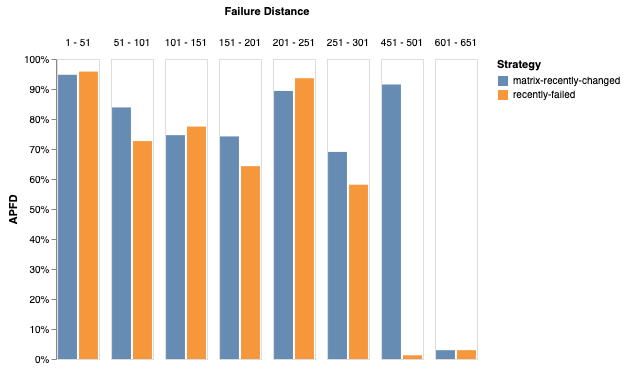

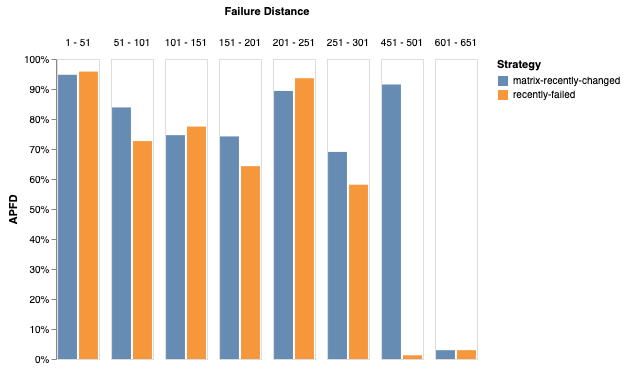

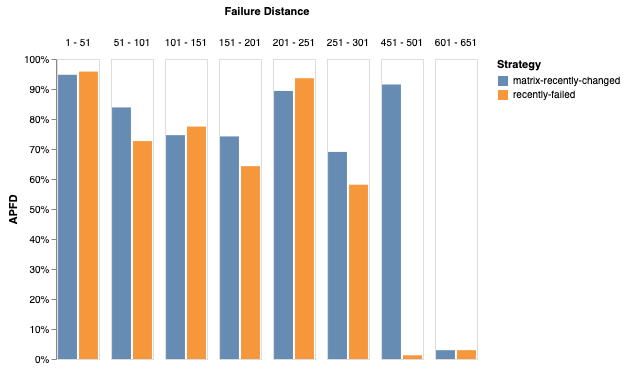

In [51]:
distance_bar_chart(df)

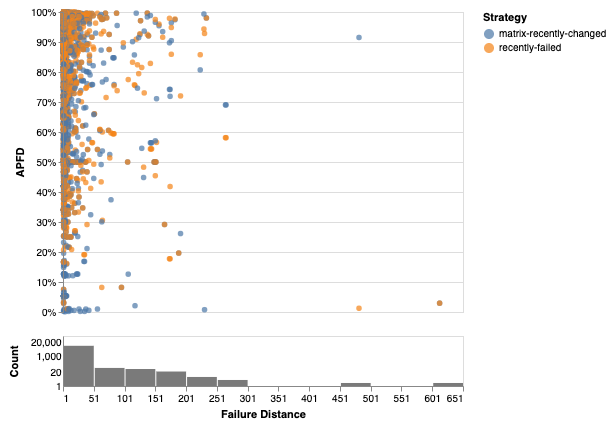

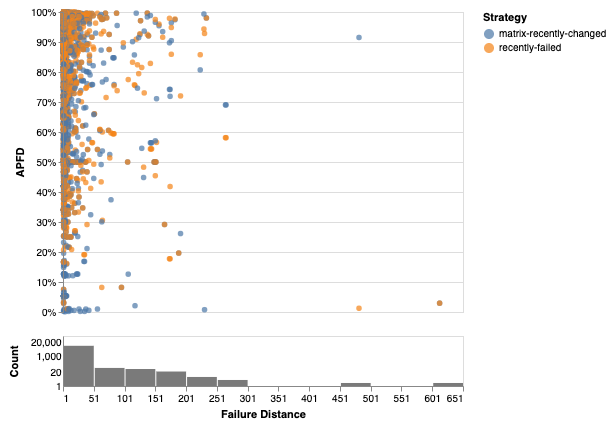

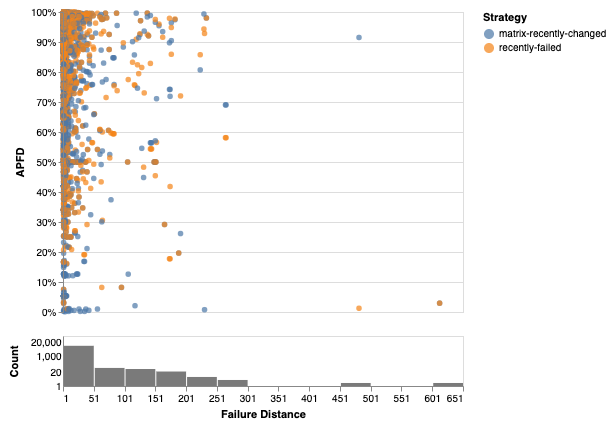

In [13]:
make_scatter_chart(df)

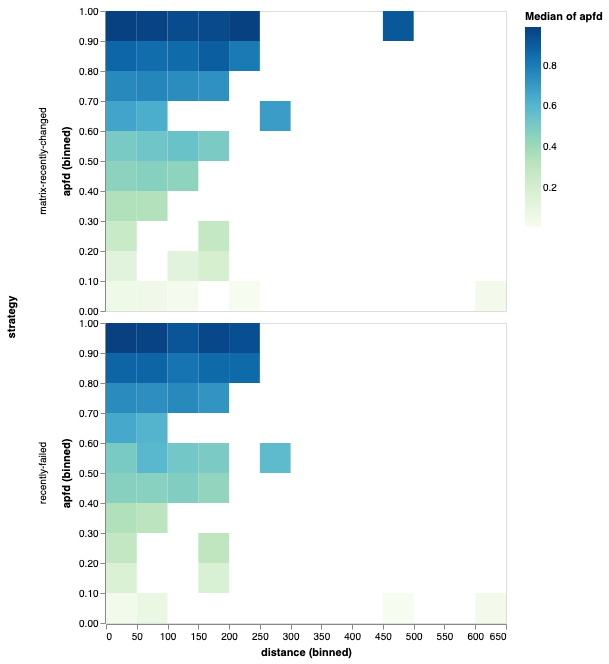

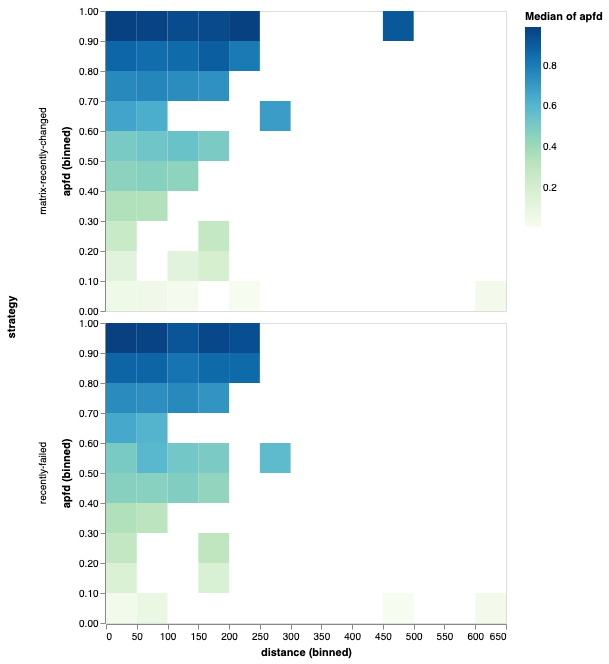

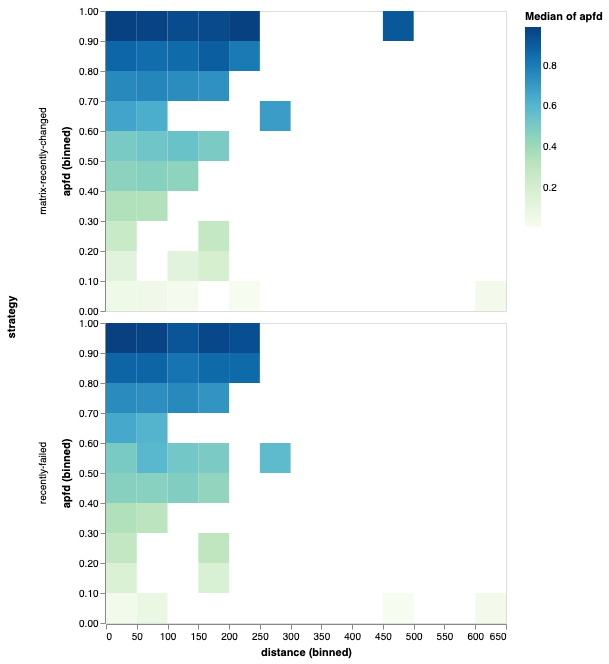

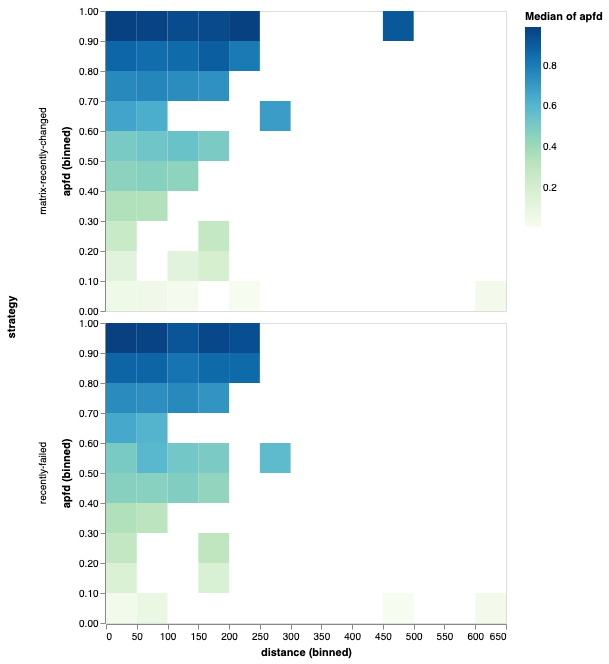

In [7]:
import altair as alt
alt.Chart(df).mark_rect().encode(
    x=alt.X('distance', bin=alt.BinParams(maxbins=20)),
    y=alt.Y('apfd', bin=alt.BinParams(maxbins=10)),
    color=alt.Color('median(apfd)', scale=alt.Scale(scheme='greenblue'))
).transform_filter('datum.apfd != NaN').facet('strategy')

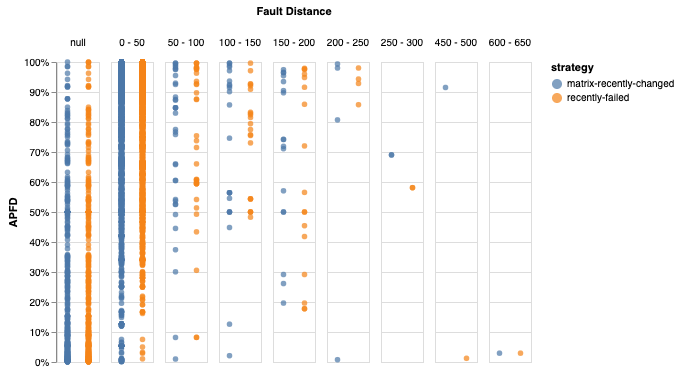

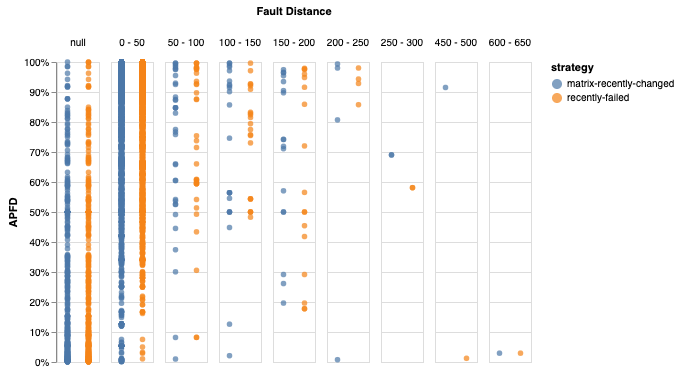

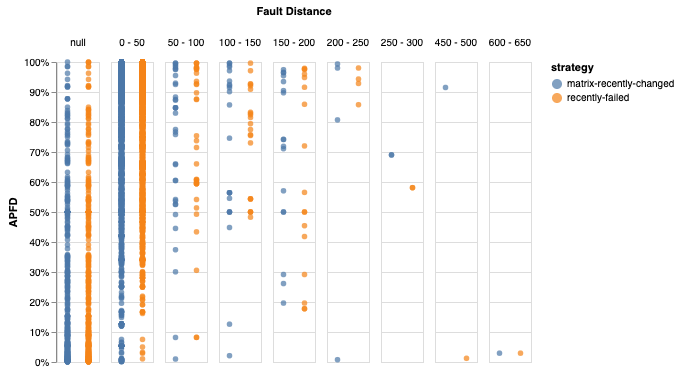

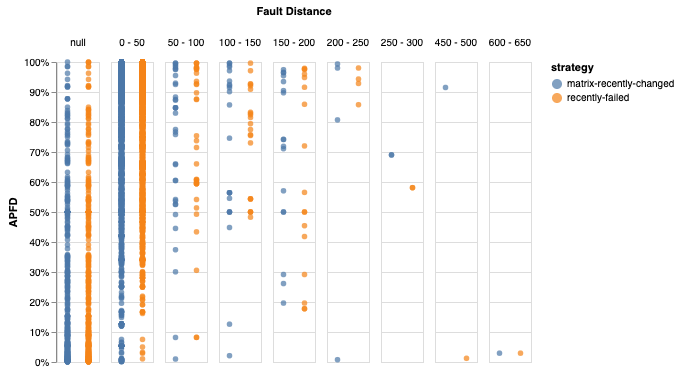

In [8]:
import altair as alt

a = alt.Chart(df).mark_point(filled=True).encode(
        x=alt.X('strategy:O', title='', axis=None),
        y=alt.Y('apfd', axis=alt.Axis(format='%'), title='APFD'),
        color='strategy',
        column=alt.Column('distance', bin=alt.BinParams(maxbins=20),
                          title='Fault Distance')
    )
a

In [9]:
# How many builds exclusively contain only first occurrences of test case failures?
abs(df['distance'].count() / len(df) - 1)

0.07001575354454748

In [55]:
rf = df[df['distance'].between(101, 151) & (df['strategy'] == 'recently-failed')].sort_values(by='apfd', ascending=False)
rf.head()

travisBuildId         strategy      apfd  distance
1361      132834191  recently-failed  0.996193     137.0
723       154848999  recently-failed  0.975078     150.0
347        55956235  recently-failed  0.970874     126.0
571       107772790  recently-failed  0.927386     125.0
765        96836592  recently-failed  0.925494     137.0

In [22]:
from testmining import cache
b = cache.read('builds')[['gh_project_name']].reset_index()
b.head()

tr_build_id    gh_project_name
0       106060        rails/rails
1       106176        rails/rails
2       106236  intridea/omniauth
3       106306   myronmarston/vcr
4       106359  intridea/omniauth

In [56]:
merged = pd.merge(left=rf, right=b, left_on='travisBuildId', right_on='tr_build_id', validate='1:1')
merged['quint'] = pd.qcut(merged['apfd'], 5, labels=False)
merged.groupby('quint').apply(lambda x: x['gh_project_name'].value_counts()).to_frame()

gh_project_name
quint                                               
0     deeplearning4j/deeplearning4j                5
      square/okhttp                                1
      SonarSource/sonarqube                        1
1     jOOQ/jOOQ                                    3
      CloudifySource/cloudify                      1
2     jcabi/jcabi-github                           3
      CloudifySource/cloudify                      2
3     jcabi/jcabi-github                           2
      SonarSource/sonarqube                        1
      apache/storm                                 1
      apache/sling                                 1
4     SonarSource/sonarqube                        2
      apache/sling                                 2
      apache/storm                                 1

In [57]:
mrc = df[df['distance'].between(101, 151) & (df['strategy'] == 'matrix-recently-changed')].sort_values(by='apfd', ascending=False)
merged = pd.merge(left=rf, right=b, left_on='travisBuildId', right_on='tr_build_id', validate='1:1')
merged['quint'] = pd.qcut(merged['apfd'], 5, labels=False)
merged.groupby('quint').apply(lambda x: x['gh_project_name'].value_counts()).to_frame()

gh_project_name
quint                                               
0     deeplearning4j/deeplearning4j                5
      square/okhttp                                1
      SonarSource/sonarqube                        1
1     jOOQ/jOOQ                                    3
      CloudifySource/cloudify                      1
2     jcabi/jcabi-github                           3
      CloudifySource/cloudify                      2
3     jcabi/jcabi-github                           2
      SonarSource/sonarqube                        1
      apache/storm                                 1
      apache/sling                                 1
4     SonarSource/sonarqube                        2
      apache/sling                                 2
      apache/storm                                 1